In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# data import path

path  = r'C:\Users\Layzr\Desktop\School\Data Immersion Part 4\Achievement 4'

In [3]:
# importing data

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_merged.pkl'))

In [4]:
# dropping PII information from dataset

ords_prods_merge.drop(columns=['first_name', 'last_name'], inplace=True)

In [5]:
# creating region map

region_map = {
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
    'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast',

    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest',
    'Ohio': 'Midwest', 'Wisconsin': 'Midwest', 'Iowa': 'Midwest',
    'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest',
    'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest',

    'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South',
    'Maryland': 'South', 'North Carolina': 'South', 'South Carolina': 'South',
    'Virginia': 'South', 'District of Columbia': 'South', 'West Virginia': 'South',
    'Alabama': 'South', 'Kentucky': 'South', 'Mississippi': 'South',
    'Tennessee': 'South', 'Arkansas': 'South', 'Louisiana': 'South',
    'Oklahoma': 'South', 'Texas': 'South',

    'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West',
    'Montana': 'West', 'Nevada': 'West', 'New Mexico': 'West',
    'Utah': 'West', 'Wyoming': 'West', 'Alaska': 'West',
    'California': 'West', 'Hawaii': 'West', 'Oregon': 'West',
    'Washington': 'West'
}

# Apply the mapping
ords_prods_merge['Region'] = ords_prods_merge['state'].map(region_map)

<Axes: xlabel='Region'>

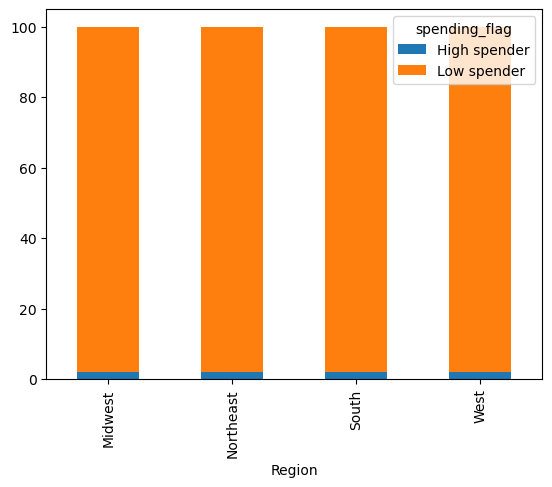

In [6]:
# creating a visualization to compare the spending flag across regions

spending_summary = pd.crosstab(ords_prods_merge['Region'], ords_prods_merge['spending_flag'], normalize='index') * 100
spending_summary.plot(kind='bar', stacked=True)

In [7]:
# creating an exclusion flag for customers with over 5 orders

ords_prods_merge['exclusion_flag'] = np.where(ords_prods_merge['customer_order_count'] < 5, True, False)
high_activity = ords_prods_merge[ords_prods_merge['exclusion_flag'] == False]

In [8]:
high_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merge_high_activity.pkl'))

In [9]:
# creating some standard profiling

def profile(row):
    if row['income'] < 40000 and row['age'] < 30 and row['n_dependants'] == 0:
        return 'Young Single'
    elif row['income'] > 100000 and row['n_dependants'] > 2:
        return 'Affluent Parent'
    elif row['department_id'] == 18:  # Baby products
        return 'Parent'
    else:
        return 'Other'

high_activity['profile'] = high_activity.apply(profile, axis=1)

C:\Users\Layzr\AppData\Local\Temp\ipykernel_14872\1196931576.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity['profile'] = high_activity.apply(profile, axis=1)


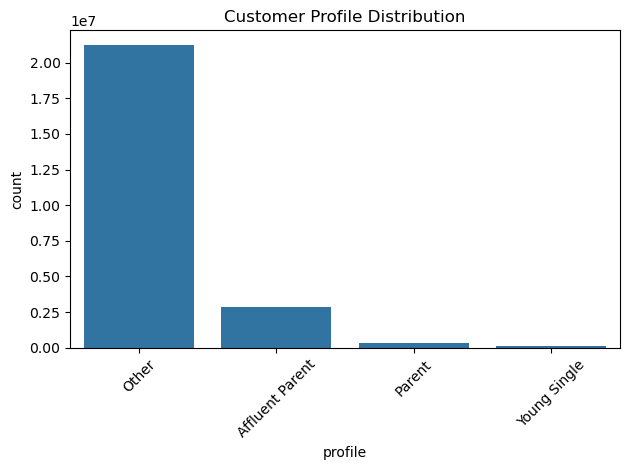

In [10]:
# creating a visualization for the profiles

profile_vis = sns.countplot(data=high_activity, x='profile')
plt.title('Customer Profile Distribution')
plt.xticks(rotation=45)
plt.tight_layout()

In [11]:
# exporting visualization

profile_vis.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profiles.png'))

In [12]:
# creating an aggregation for the standard summary statistics of customer_order_count and prices

agg_profile = high_activity.groupby('profile').agg({
    'customer_order_count': ['mean', 'max', 'min'],
    'prices': ['mean', 'max', 'min']
}).reset_index()

In [13]:
agg_profile

profile customer_order_count            prices           
                                   mean max min      mean   max  min
0  Affluent Parent            21.887447  99   5  7.946039  25.0  1.0
1            Other            21.939045  99   5  7.777291  25.0  1.0
2           Parent            23.628067  99   5  7.618278  15.0  1.0
3     Young Single            20.892886  99   5  6.484073  25.0  1.0

In [14]:
# creating crosstab for comparing the profiles with regions and departments

pd.crosstab(high_activity['profile'], high_activity['Region'], normalize='index')
pd.crosstab(high_activity['profile'], high_activity['department_id'])

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
profile,,,,,,,,,,,,,,,,,,,,,
Affluent Parent,192140,3110,103618,853688,13135,23125,223317,9896,77302,2793,...,66492,163902,58369,96288,481671,62834,42398,220050,90475,6496
Other,1430654,23948,777399,6353453,94388,174141,1804290,61926,554834,24626,...,456794,1217764,464321,689631,3626566,474437,0,1952921,689981,50924
Parent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,293069,0,0,0
Young Single,4820,108,2313,19950,449,634,8840,289,1589,139,...,604,3709,2255,1871,12251,2078,480,14150,2555,147


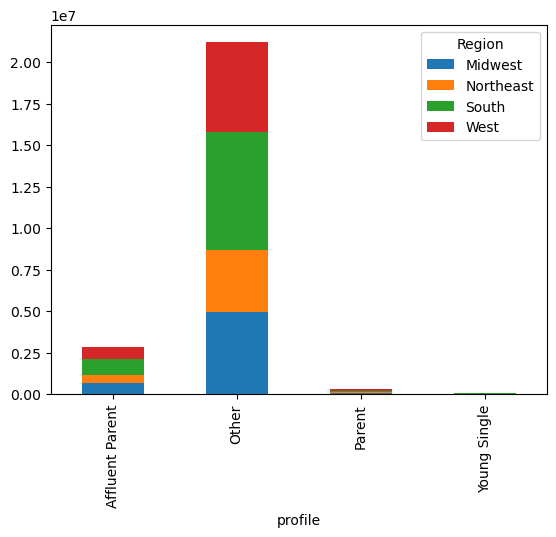

In [15]:
# creating visualization of the crosstab for comparing the profiles with regions and departments

profile_region = pd.crosstab(high_activity['profile'], high_activity['Region'])
profile_region = profile_region.plot(kind='bar', stacked=True)

In [16]:
# saving visualization

profile_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profile_region.png'))

In [18]:
# removing unneeded columns

high_activity.drop(columns=['eval_set', '_merge'], inplace=True)

C:\Users\Layzr\AppData\Local\Temp\ipykernel_14872\4000125998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity.drop(columns=['eval_set', '_merge'], inplace=True)


In [20]:
# exporting final dataset

high_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_dataset.pkl'))